# Page Detection
This code finds and crops the page out of the image

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

sys.path.append('../src')
from ocr.helpers import implt, resize, ratio

%matplotlib inline
plt.rcParams['figure.figsize'] = (9.0, 9.0)

### Global Variables

In [2]:
IMG = "p3"    # Image name/number

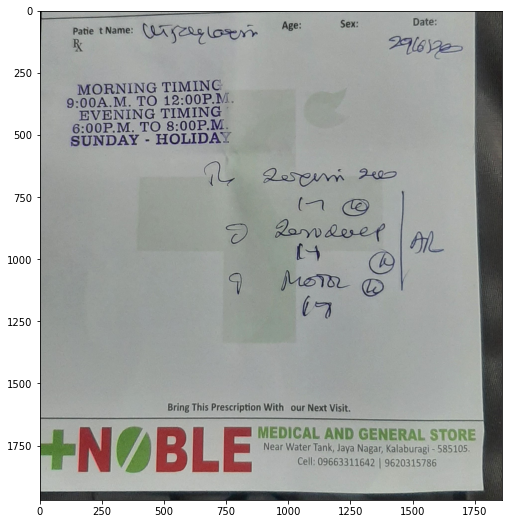

In [3]:
# Loading images and ploting it (converting to RGB from BGR)
image = cv2.cvtColor(cv2.imread("../data/pages/%s.jpg" % IMG), cv2.COLOR_BGR2RGB)
implt(image)

In [4]:
def edges_det(img, min_val, max_val):
    """ Preprocessing (gray, thresh, filter, border) + Canny edge detection """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Applying blur and threshold
    img = cv2.bilateralFilter(img, 9, 75, 75)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 4)
    implt(img, 'gray', 'Adaptive Threshold')

    # Median blur replace center pixel by median of pixels under kelner
    # => removes thin details
    img = cv2.medianBlur(img, 11)

    # Add black border - detection of border touching pages
    # Contour can't touch side of image
    img = cv2.copyMakeBorder(img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    implt(img, 'gray', 'Median Blur + Border')

    return cv2.Canny(img, min_val, max_val)

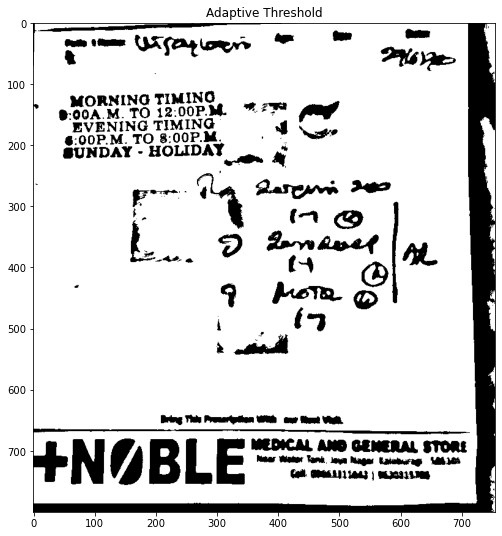

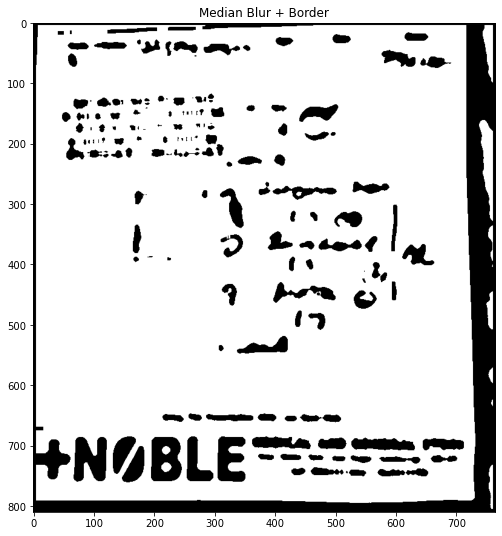

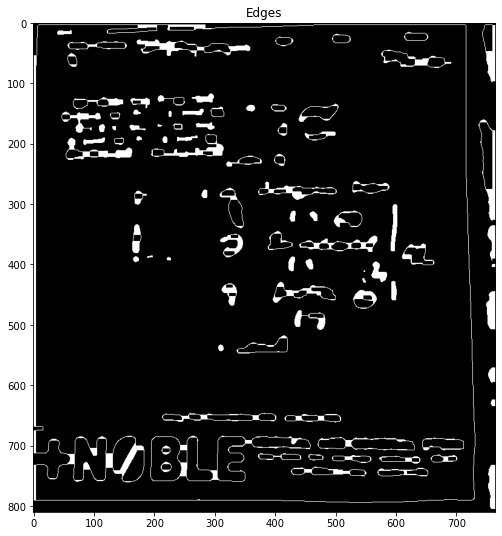

[[[32 33 35]
  [32 34 33]
  [45 49 45]
  ...
  [60 60 52]
  [73 73 65]
  [81 80 76]]

 [[25 26 28]
  [37 38 40]
  [45 49 45]
  ...
  [65 65 57]
  [71 71 63]
  [86 85 81]]

 [[24 25 28]
  [36 37 38]
  [50 54 51]
  ...
  [70 70 64]
  [64 63 58]
  [85 84 80]]

 ...

 [[45 50 50]
  [39 43 44]
  [48 52 53]
  ...
  [56 55 53]
  [50 49 45]
  [52 51 47]]

 [[47 48 50]
  [40 41 43]
  [53 54 56]
  ...
  [54 53 51]
  [49 48 46]
  [53 52 48]]

 [[46 47 48]
  [44 45 46]
  [49 50 52]
  ...
  [59 57 57]
  [49 48 46]
  [55 54 51]]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
small = resize(image)
# Edge detection ()
edges_image = edges_det(small, 200, 250)

# Close gaps between edges (double page clouse => rectangle kernel)
edges_image = cv2.morphologyEx(edges_image, cv2.MORPH_CLOSE, np.ones((5, 11)))
implt(edges_image, 'gray', 'Edges')
print(small)
print(edges_image)